In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"D:\data science\DS projects\kc_house_data\kc_house_data.csv")

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.drop(["id","date","zipcode"],axis = 1,inplace=True)

In [5]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [6]:
data.shape

(21613, 18)

In [7]:
data.isnull().any().sum()

0

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
dtypes: flo

In [9]:
data.bedrooms.unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33], dtype=int64)

In [10]:
x = data.iloc[:,1:]
y = data.iloc[:,0]

In [11]:
x

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287


In [12]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [15]:
x_train.shape, y_train.shape

((17290, 17), (17290,))

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
x_train = scaler.fit_transform(x_train) 

In [19]:
x_test = scaler.transform(x_test)

In [ ]:
x_train

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr = LinearRegression()

In [22]:
lr.fit(x_train,y_train)

LinearRegression()

In [23]:
lr.score(x_train,y_train)

0.696560271438684

In [24]:
lr.score(x_test,y_test)

0.688931699533415

In [25]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [26]:
y_pred = lr.predict(x_test)

In [27]:
from sklearn.metrics import r2_score

In [28]:
r2_score(y_test,y_pred)

0.688931699533415

In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
linear = LinearRegression()

In [31]:
cvs = cross_val_score(linear, x,y ,cv = 5)

In [32]:
cvs, cvs.mean()

(array([0.69192856, 0.68666047, 0.68801187, 0.70254317, 0.68218674]),
 0.6902661629184736)

In [33]:
from sklearn.linear_model import Ridge

In [34]:
li_rid = Ridge()

In [35]:
li_rid.fit(x_train,y_train)

Ridge()

In [36]:
y_prid2 = li_rid.predict(x_test)

In [37]:
r2_score(y_test,y_prid2)

0.6889323854080058

In [38]:
from sklearn.tree import DecisionTreeRegressor

In [39]:
dtr = DecisionTreeRegressor()

In [40]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [41]:
dtr.score(x_train,y_train)

0.9992510888703682

In [42]:
dtr.score(x_test,y_test)

0.7844109792299361

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
dtr1 = DecisionTreeRegressor()

In [45]:
param_grid = {"max_depth":[1,2,3],
    "min_samples_split":[1,2,3,4] ,
    "min_samples_leaf":[1,2,3,]}

In [46]:
dtr_grid = GridSearchCV(dtr1,param_grid,cv = 5,n_jobs=-1)

In [47]:
dtr_grid.fit(x,y)

C:\Users\91707\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\91707\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91707\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1315, in fit
    super().fit(
  File "C:\Users\91707\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float in (

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3, 4]})

In [48]:
dtr_grid.best_params_

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [49]:
dtr_grid.best_score_

0.5748759071910924

In [50]:
from sklearn.linear_model import Lasso

In [51]:
las = Lasso()

In [52]:
las.fit(x_train,y_train)

C:\Users\91707\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.259e+13, tolerance: 2.398e+11
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [53]:
las.score(x_train,y_train)

0.6965602711601919

In [54]:
las1 = Lasso()

In [55]:
las_grid = GridSearchCV(las1,param_grid ={"alpha":[1.0,1.5,2.0,2.5]} ,cv = 5,n_jobs=-1)

In [56]:
las_grid.fit(x,y)

C:\Users\91707\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.040e+14, tolerance: 2.913e+11
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [1.0, 1.5, 2.0, 2.5]})

In [57]:
las_grid.best_params_

{'alpha': 1.0}

In [58]:
las_grid.best_score_

0.6902661492470851

In [59]:
las2 = Lasso()

In [60]:
las_cvs = cross_val_score(las2,x,y,cv = 5)

C:\Users\91707\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.141e+14, tolerance: 2.258e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\91707\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.152e+14, tolerance: 2.306e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\91707\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.309e+14, toleranc

In [61]:
las_cvs

array([0.69192392, 0.68666196, 0.6880132 , 0.70254816, 0.6821835 ])

In [62]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [63]:
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,0.114084,0.198372,0.713202,0.119248


<AxesSubplot:>

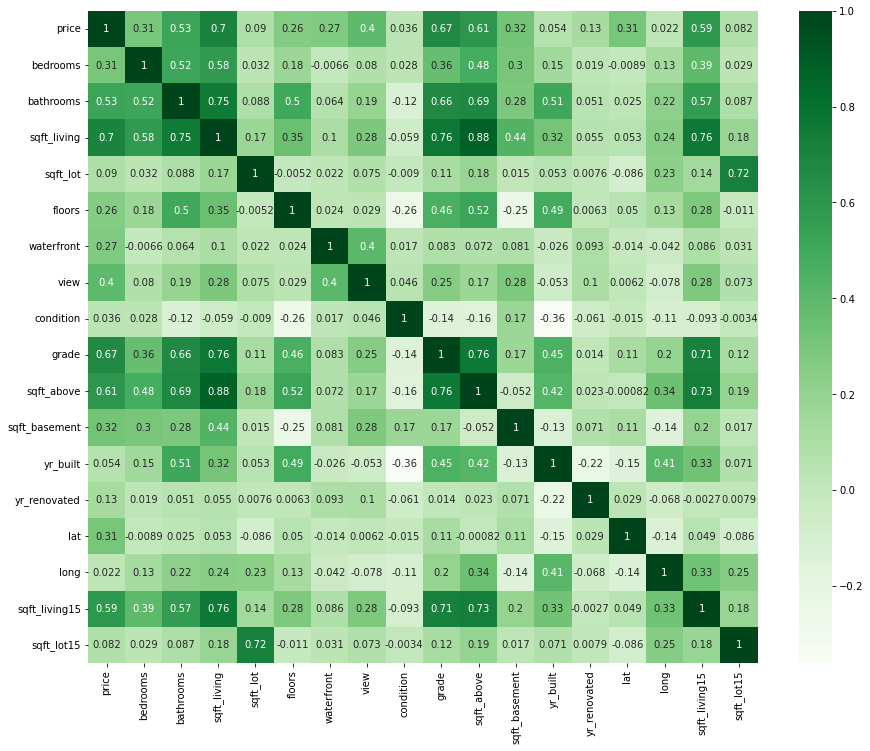

In [64]:
plt.figure(figsize = (15,12))
sns.heatmap(data.corr(), annot = True, cmap = "Greens")

In [65]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [66]:
for col in data.columns:
    for colm in data.columns:
        if (data[col].corr(data[colm]) > 0.70):
            print("{} - {} ({}),".format(col,colm,data[col].corr(data[colm])))
            

price - price (1.0),
price - sqft_living (0.7020350546118004),
bedrooms - bedrooms (0.9999999999999999),
bathrooms - bathrooms (1.0),
bathrooms - sqft_living (0.7546652789673733),
sqft_living - price (0.7020350546118004),
sqft_living - bathrooms (0.7546652789673733),
sqft_living - sqft_living (1.0),
sqft_living - grade (0.76270447645847),
sqft_living - sqft_above (0.8765965986813181),
sqft_living - sqft_living15 (0.7564202590172213),
sqft_lot - sqft_lot (1.0),
sqft_lot - sqft_lot15 (0.7185567524330345),
floors - floors (1.0),
waterfront - waterfront (1.0),
view - view (0.9999999999999999),
condition - condition (0.9999999999999998),
grade - sqft_living (0.76270447645847),
grade - grade (1.0),
grade - sqft_above (0.7559229376236443),
grade - sqft_living15 (0.7132020930151733),
sqft_above - sqft_living (0.8765965986813181),
sqft_above - grade (0.7559229376236444),
sqft_above - sqft_above (1.0),
sqft_above - sqft_living15 (0.7318702923539875),
sqft_basement - sqft_basement (1.0),
yr_built

In [67]:
x.drop(['grade',"sqft_living15"], axis = 1, inplace = True) 

In [68]:
x

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,1180,0,1955,0,47.5112,-122.257,5650
1,3,2.25,2570,7242,2.0,0,0,3,2170,400,1951,1991,47.7210,-122.319,7639
2,2,1.00,770,10000,1.0,0,0,3,770,0,1933,0,47.7379,-122.233,8062
3,4,3.00,1960,5000,1.0,0,0,5,1050,910,1965,0,47.5208,-122.393,5000
4,3,2.00,1680,8080,1.0,0,0,3,1680,0,1987,0,47.6168,-122.045,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,1530,0,2009,0,47.6993,-122.346,1509
21609,4,2.50,2310,5813,2.0,0,0,3,2310,0,2014,0,47.5107,-122.362,7200
21610,2,0.75,1020,1350,2.0,0,0,3,1020,0,2009,0,47.5944,-122.299,2007
21611,3,2.50,1600,2388,2.0,0,0,3,1600,0,2004,0,47.5345,-122.069,1287


In [69]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287


In [70]:
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = 0.2, random_state = 0, shuffle=True)

In [71]:
from sklearn.linear_model import ElasticNet

In [72]:
el = ElasticNet()

In [73]:
el.fit(x_tr,y_tr)

C:\Users\91707\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.226e+14, tolerance: 2.398e+11
  model = cd_fast.enet_coordinate_descent(


ElasticNet()

In [74]:
el.score(x_tr,y_tr)

0.5799779632681719

In [75]:
el.score(x_te,y_te)

0.5637244734929243

In [76]:
x

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,1180,0,1955,0,47.5112,-122.257,5650
1,3,2.25,2570,7242,2.0,0,0,3,2170,400,1951,1991,47.7210,-122.319,7639
2,2,1.00,770,10000,1.0,0,0,3,770,0,1933,0,47.7379,-122.233,8062
3,4,3.00,1960,5000,1.0,0,0,5,1050,910,1965,0,47.5208,-122.393,5000
4,3,2.00,1680,8080,1.0,0,0,3,1680,0,1987,0,47.6168,-122.045,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,1530,0,2009,0,47.6993,-122.346,1509
21609,4,2.50,2310,5813,2.0,0,0,3,2310,0,2014,0,47.5107,-122.362,7200
21610,2,0.75,1020,1350,2.0,0,0,3,1020,0,2009,0,47.5944,-122.299,2007
21611,3,2.50,1600,2388,2.0,0,0,3,1600,0,2004,0,47.5345,-122.069,1287


In [77]:
lr3 = LinearRegression()

In [78]:
lr3.fit(x_tr,y_tr)

LinearRegression()

In [79]:
lr3.score(x_tr,y_tr)

0.6635306267597665

In [80]:
lr3.score(x_te,y_te)

0.6440207228855929

In [81]:
from sklearn.preprocessing import MinMaxScaler

In [82]:
mms = MinMaxScaler()

In [83]:
x_tr = mms.fit_transform(x_tr)

In [84]:
x_te = mms.transform(x_te)

In [85]:
lr4 = LinearRegression()

In [86]:
lr4.fit(x_tr,y_tr)

LinearRegression()

In [87]:
lr4.score(x_tr,y_tr)

0.6635306267597666

In [88]:
from xgboost import XGBRegressor

In [89]:
xgbr = XGBRegressor(base_score=None, booster="gblinear" , callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=r2_score, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=0)

In [90]:
xgbr.fit(x_train,y_train)

[14:41:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_depth" } are not used.



XGBRegressor(base_score=None, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False,
             eval_metric=<function r2_score at 0x00000191B399C4C0>,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=-1,
             num_parallel_tree=None, predictor=None, random_state=0, ...)

In [91]:
xgbr.score(x_train,y_train)

0.6965602727803162

In [92]:
xgbr.score(x_test,y_test)

0.6889317266172963

In [93]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

In [94]:
x_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_lot15
1468,4,1.50,1390,7200,1.0,0,0,3,1140,250,1965,0,47.7224,-122.332,7702
15590,3,1.50,1450,7316,1.0,0,0,3,1450,0,1961,0,47.7725,-122.349,7316
18552,5,2.75,2860,5379,2.0,0,0,3,2860,0,2005,0,47.7082,-122.104,6018
10535,2,1.00,1050,4125,1.0,0,0,4,1050,0,1909,0,47.5736,-122.307,4125
1069,2,1.00,1240,57000,1.0,0,0,3,1240,0,1962,0,47.5970,-122.059,25545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,5,5.00,3960,94089,2.0,0,0,3,3960,0,1998,0,47.3800,-122.011,64468
19648,2,2.50,1400,1262,2.0,0,0,3,1160,240,2008,0,47.5342,-122.349,1524
9845,3,2.25,2360,14950,1.0,0,0,4,2360,0,1978,0,47.3856,-122.158,14388
10799,4,2.00,2370,76665,2.0,0,0,4,2370,0,1978,0,47.2831,-122.279,19334


In [95]:
from sklearn.ensemble import RandomForestRegressor

In [96]:
rfr = RandomForestRegressor()

In [97]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [98]:
rfr.score(x_train,y_train)

0.9788568280544805

In [99]:
rfr.score(x_test,y_test)

0.8720692840872921

In [100]:
x_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_lot15
1468,4,1.50,1390,7200,1.0,0,0,3,1140,250,1965,0,47.7224,-122.332,7702
15590,3,1.50,1450,7316,1.0,0,0,3,1450,0,1961,0,47.7725,-122.349,7316
18552,5,2.75,2860,5379,2.0,0,0,3,2860,0,2005,0,47.7082,-122.104,6018
10535,2,1.00,1050,4125,1.0,0,0,4,1050,0,1909,0,47.5736,-122.307,4125
1069,2,1.00,1240,57000,1.0,0,0,3,1240,0,1962,0,47.5970,-122.059,25545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,5,5.00,3960,94089,2.0,0,0,3,3960,0,1998,0,47.3800,-122.011,64468
19648,2,2.50,1400,1262,2.0,0,0,3,1160,240,2008,0,47.5342,-122.349,1524
9845,3,2.25,2360,14950,1.0,0,0,4,2360,0,1978,0,47.3856,-122.158,14388
10799,4,2.00,2370,76665,2.0,0,0,4,2370,0,1978,0,47.2831,-122.279,19334


In [101]:
x_train.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_lot15'],
      dtype='object')

In [102]:
len(x_train.columns)

15

In [29]:
x_train.dtypes

bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [103]:
from joblib import dump

In [24]:
dump(rfr,"RandomForestRegressor.joblib")

['RandomForestRegressor.joblib']